<a href="https://colab.research.google.com/github/GabrielGuilherme88/AnaliseMovieLens/blob/master/Copy_of_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#Para leitura de arquivos em CSV diretamente do GITHUB
movies =pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
movies.head

<bound method NDFrame.head of       movieId  ...                                       genres
0           1  ...  Adventure|Animation|Children|Comedy|Fantasy
1           2  ...                   Adventure|Children|Fantasy
2           3  ...                               Comedy|Romance
3           4  ...                         Comedy|Drama|Romance
4           5  ...                                       Comedy
...       ...  ...                                          ...
9737   193581  ...              Action|Animation|Comedy|Fantasy
9738   193583  ...                     Animation|Comedy|Fantasy
9739   193585  ...                                        Drama
9740   193587  ...                             Action|Animation
9741   193609  ...                                       Comedy

[9742 rows x 3 columns]>

In [ ]:
ratings = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
import pandas as pd #manipulação de dados
import io
from google.colab import files

In [ ]:
#o comando quhery faz uma busca, em determinada coluna do valor desejado, no caso abaixo, ==1
movies.query("movieId == 1")


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.shape #mostra a dimensão do dataframe, número de linhas e colunas

(100836, 4)

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
#Retorna a média da coluna movieId agrupado pela coluna rating do dataframe ratings
m_rating = ratings.groupby("movieId")["rating"].mean()
m_rating.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

**Desafio 1: Determinar quantos filmes não possuem avaliações, e quais são eles**

**Desafio 2: Alterar o nome da coluna de médias das notas**

In [ ]:
movies_avg = movies.join(m_rating, on = "movieId")
movies_avg.columns = ["movieId" ,"tittle" ,"genres" ,"avgrating"]
movies_avg.head()

,movieId,tittle,genres,avgrating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [ ]:
df = movies_avg[movies_avg.avgrating.isna()]
for x in df.tittle:
    print(x)

Innocents, The (1961)
Niagara (1953)
For All Mankind (1989)
Color of Paradise, The (Rang-e khoda) (1999)
I Know Where I'm Going! (1945)
Chosen, The (1981)
Road Home, The (Wo de fu qin mu qin) (1999)
Scrooge (1970)
Proof (1991)
Parallax View, The (1974)
This Gun for Hire (1942)
Roaring Twenties, The (1939)
Mutiny on the Bounty (1962)
In the Realms of the Unreal (2004)
Twentieth Century (1934)
Call Northside 777 (1948)
Browning Version, The (1951)
Chalet Girl (2011)


**Desafio 3: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.**

In [ ]:
avaliações_count = ratings.groupby("movieId")["rating"].count()
movies_count = movies.join(avaliações_count, on = "movieId")
movies_count.columns = ["movieId" ,"tittle" ,"genres" ,"count_rating"]
movies_count = movies_count.sort_values("count_rating", ascending = False) 
movies_count.head()

,movieId,tittle,genres,count_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


**Desafio 4: alterar as casas decimais**

In [ ]:
#Desafio 4
movies_avg2 = movies_avg.round({"avgrating": 2}) #arredondar as casas decimais da coluna avg_rating
movies_avg2.head()

,movieId,tittle,genres,avgrating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


**Desafio 5: Descobrir os generos dos filmes (quais são eles, únicos)**

In [ ]:
import numpy as np
generos_filmes = movies_avg2.genres.str.split(pat="|")
generos = pd.Series(np.concatenate(generos_filmes)).value_counts()
generos.head(50)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

**Desafio 7 - Plotar em barras quantas vezes cada gênero aparece**

In [ ]:
import matplotlib.pyplot as plt

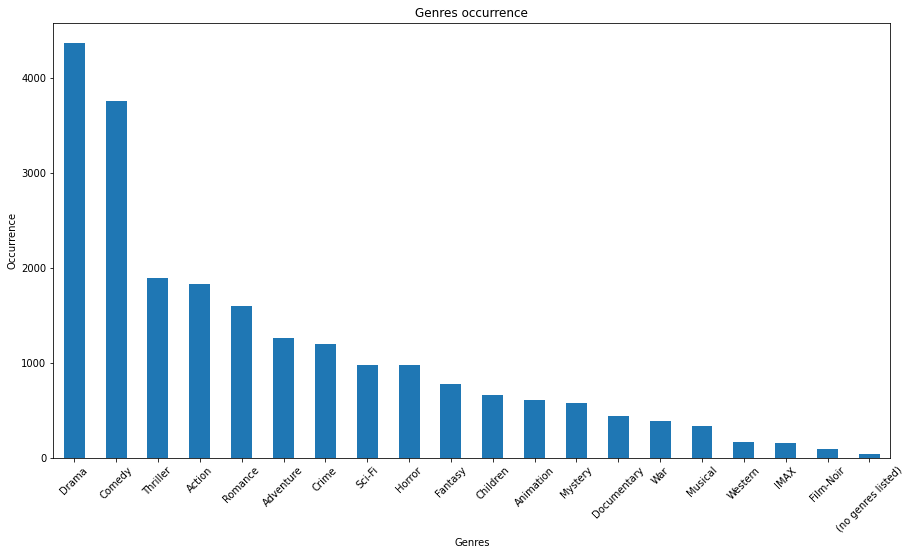

In [ ]:
plt.figure(figsize=(15,8))
generos.plot(kind='bar',title='Genres occurrence')
plt.xlabel("Genres")
plt.ylabel("Occurrence")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#####################################################################################################################################################

In [ ]:
#Separa a coluna genres em novas colunas renomeadas 
split_genres = movies.join(movies['genres'].str.split('|', 4, expand=True).rename(columns={0:'genres1', 1:'genres2', 2:"genres3", 3:"genres4", 4: "genres5"}))
split_genres.head(200)

,movieId,title,genres,genres1,genres2,genres3,genres4,genres5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure,Children,Fantasy,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy,Drama,Romance,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None
...,...,...,...,...,...,...,...,...
195,229,Death and the Maiden (1994),Drama|Thriller,Drama,Thriller,None,None,None
196,230,Dolores Claiborne (1995),Drama|Thriller,Drama,Thriller,None,None,None
197,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,Adventure,Comedy,None,None,None
198,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,Comedy,Drama,Romance,None,None


In [ ]:
df1 = pd.concat([split_genres.groupby('genres1').sum(), 
                 split_genres.groupby('genres2').sum(), 
                 split_genres.groupby('genres3').sum(),
                 split_genres.groupby('genres4').sum(),
                 split_genres.groupby('genres5').sum(),])

df1.head(50)

,movieId
(no genres listed),5336305
Action,88881432
Adventure,28641526
Animation,24086663
Children,6082793
Comedy,113772010
Crime,19612334
Documentary,22496025
Drama,70764397
Fantasy,2006069


In [ ]:
####################################################################################################################################################

**Aula 2**

In [ ]:
#Uma outra forma de realizar o desafio número 7
df_movies = movies["genres"].str.get_dummies("|").sum()
print(df_movies.head(20))
#foi criado uma string, separando os generos dos filmes pelo comando ("|") e criado variáveis dummies com o get_dummies, deixando de forma numérica

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64


In [ ]:
df_movies = movies["genres"].str.get_dummies("|").sum(axis = 1).value_counts()
print(df_movies.head(20))
#atribuindo o AXIS = 1 contamos quantos generos aparecem. Isso muda o eixo da soma. 
#O maior número de generos que aparecem são 2, ou seja, a maioria dos filmes possuem 2 generos contabilizados

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64


In [ ]:
df_movies = movies["genres"].str.get_dummies("|").sum().sort_values(ascending = False)
print(df_movies.head(20))
#O comando sort_values ordena os valores de forma decrescente (por causa do comando FALSE)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64


In [ ]:
df_movies = movies["genres"].str.get_dummies("|").sum().sort_index(ascending = False)
print(df_movies.head(20))
#O comando sort_index ordena os index de forma decrescente (por causa do comando FALSE)

Western                167
War                    382
Thriller              1894
Sci-Fi                 980
Romance               1596
Mystery                573
Musical                334
IMAX                   158
Horror                 978
Film-Noir               87
Fantasy                779
Drama                 4361
Documentary            440
Crime                 1199
Comedy                3756
Children               664
Animation              611
Adventure             1263
Action                1828
(no genres listed)      34
dtype: int64


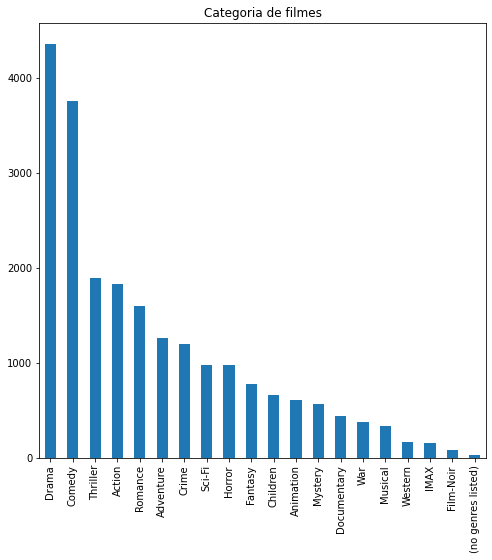

In [ ]:
df_movies = movies["genres"].str.get_dummies("|").sum().sort_values(ascending = False).plot(
    kind = "bar",
    title = "Categoria de filmes",
    figsize = (8,8)
)
plt.show()
#

**Desafio 1: Rotacionar os nomes dos generos**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


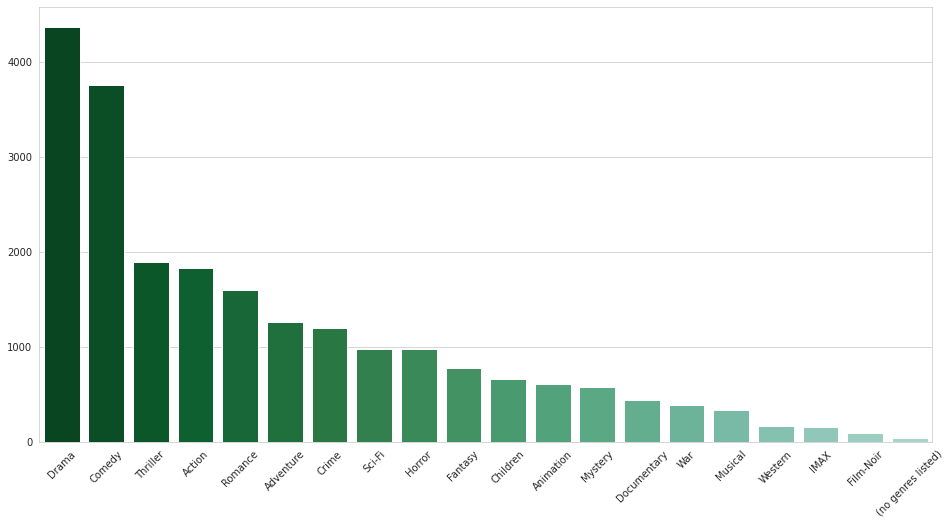

In [ ]:
import seaborn as sns

df_movies_plot = movies["genres"].str.get_dummies("|").sum().sort_values(ascending = False)

sns.set_style("whitegrid")
plt.figure(figsize = (16,8))
plt.xticks(rotation=45)
sns.barplot(x = df_movies_plot.index,
            y = df_movies_plot.values,
            palette = sns.color_palette("BuGn_r", n_colors = len(df_movies_plot)+10)  
)
plt.show()

#Foi utilizado o pacote seaborn (que tem base no matplotlib.pyplot)

In [ ]:
def plot_movie(n):
  movies_rating = ratings.query("movieId == {}".format(n))["rating"]
  movies_rating.plot(kind = "hist")
  plt.show()
  movies_rating.plot.box()
  plt.show
  return movies_rating.describe()

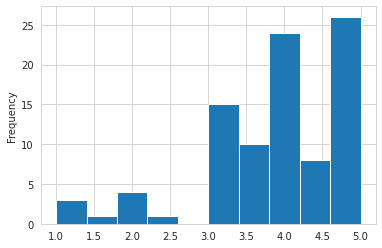

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

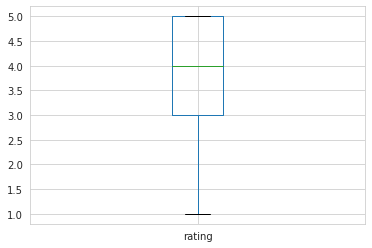

In [ ]:
plot_movie(919)

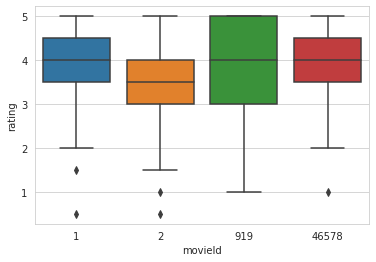

In [ ]:
sns.boxplot(data = ratings.query("movieId in [1, 2, 919, 46578]"), x = "movieId", y = "rating")

**Desafio 2: Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.**

In [ ]:
movies_avg2[1000:1100]

,movieId,tittle,genres,avgrating
1000,1302,Field of Dreams (1989),Children|Drama|Fantasy,3.52
1001,1303,"Man Who Would Be King, The (1975)",Adventure|Drama,4.03
1002,1304,Butch Cassidy and the Sundance Kid (1969),Action|Western,3.94
1003,1305,"Paris, Texas (1984)",Drama|Romance,3.50
1004,1306,Until the End of the World (Bis ans Ende der W...,Adventure|Drama|Sci-Fi,2.70
...,...,...,...,...
1095,1423,Hearts and Minds (1996),Drama,4.00
1096,1425,Fierce Creatures (1997),Comedy,3.00
1097,1426,Zeus and Roxanne (1997),Children,1.00
1098,1427,Turbulence (1997),Action|Thriller,1.00


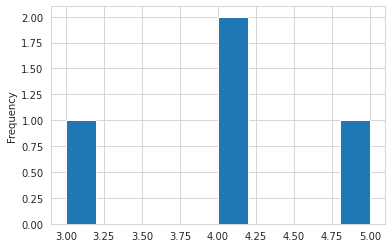

count    4.000000
mean     4.000000
std      0.816497
min      3.000000
25%      3.750000
50%      4.000000
75%      4.250000
max      5.000000
Name: rating, dtype: float64

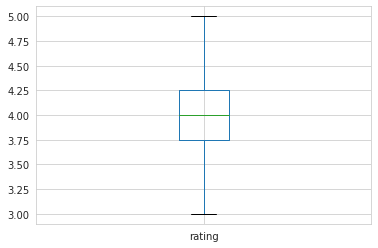

In [ ]:
plot_movie(581) #Celluloid Closet, The (1995)

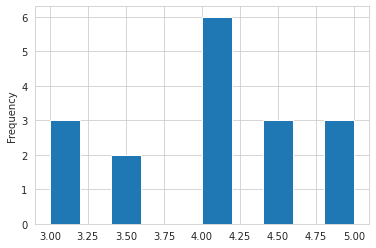

count    17.000000
mean      4.029412
std       0.672463
min       3.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64

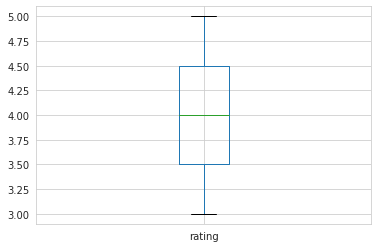

In [ ]:
plot_movie(1303) #Man Who Would Be King, The (1975)	

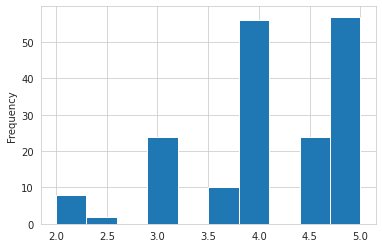

count    181.000000
mean       4.116022
std        0.828531
min        2.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

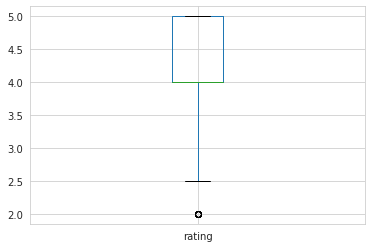

In [ ]:
plot_movie(608) #Fargo (1996)

**Desafio 3: Criar o box plot dos 10 filmes com mais votos (não com mais média, e sim com mais votos)**

**Desafio 4: O boxplot deve estar num tamanho adequado e com os nomes dos filmes no eixo X**

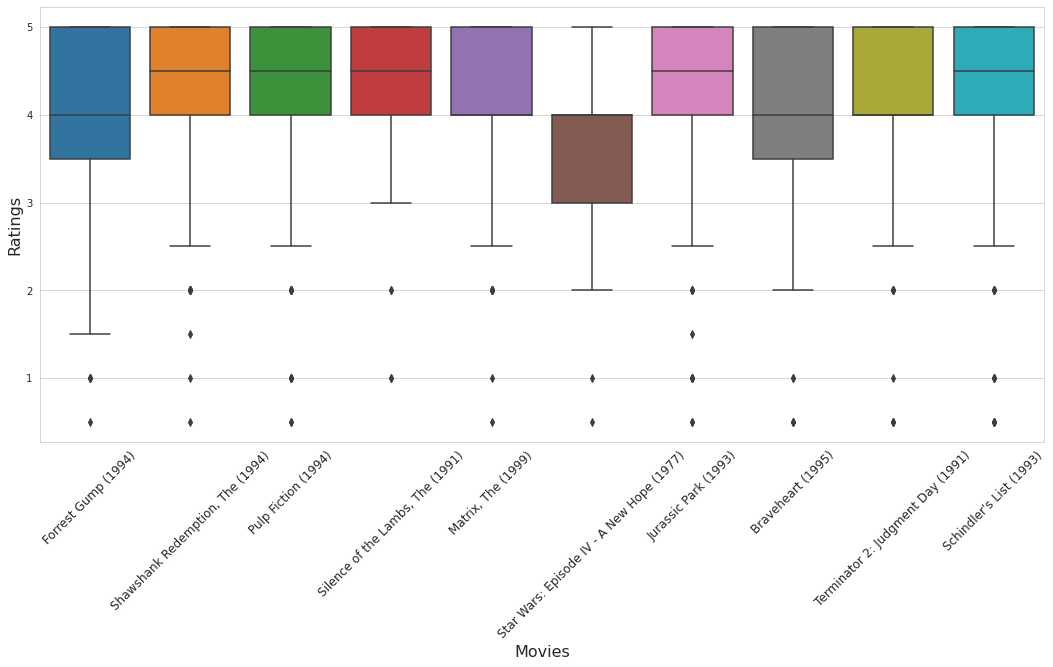

In [ ]:
top_10_movies = movies_count.head(10)
top_10_rating_tittle = top_10_movies['tittle'].to_list()
top_10_rating_id = top_10_movies['movieId'].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='movieId', y='rating', data=ratings.query(f"movieId in {top_10_rating_id}"))
ax.set_xticklabels(top_10_rating_tittle, fontsize=12)
ax.set_xlabel("Movies", fontsize=16)
ax.set_ylabel("Ratings", fontsize=16)
plt.xticks(rotation=45)

plt.show()

**Desafio 5: Calcular moda, média e mediana dos filmes. Explore filmes com notas próximas de 0.5 , 3 , 5.**

In [ ]:
def explora_filme(filme_id):
    filme = movies.query(f'movieId == {filme_id}')
    notas = ratings.query(f'movieId == {filme_id}')['rating']

    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [ ]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774) 

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


Desafio 6: plotar o boxplot e histograma um ao lado do outro (na mesma figura ou distintas)

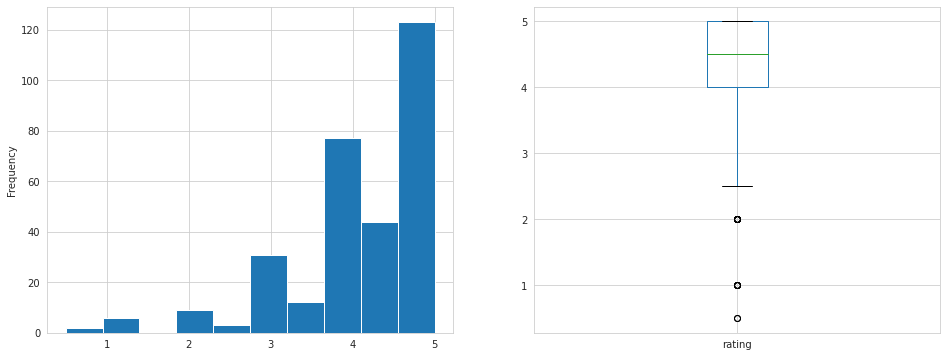

In [ ]:
pulp_fiction = ratings.query('movieId == 296')['rating']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])

plt.show()

Desafio 7: Gráfico de notas médoas por ano (time series)

In [ ]:
filmes_com_media_e_ano = movies_avg.copy()
filmes_com_media_e_ano['year'] = movies_avg['tittle'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,movieId,tittle,genres,avgrating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


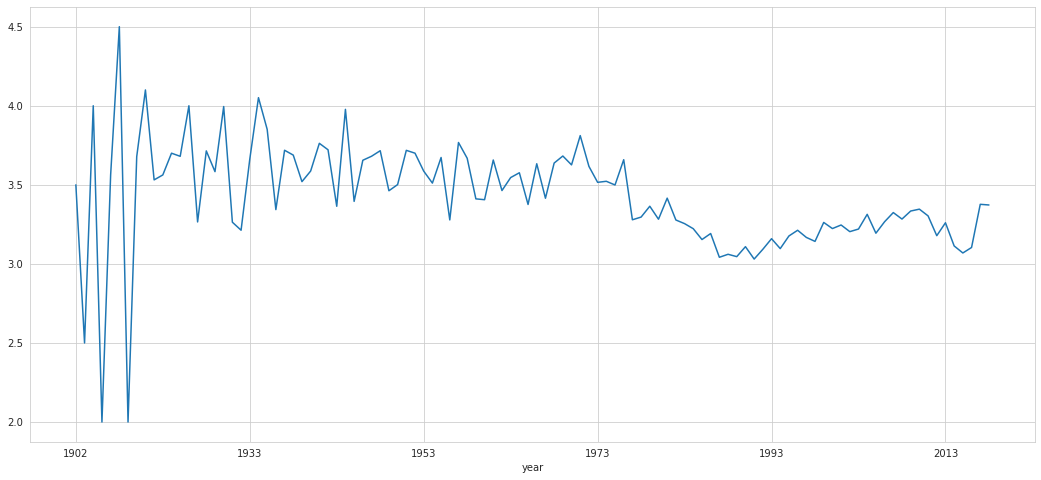

In [ ]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('year')['avgrating'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()